In [271]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import hvplot.pandas
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import feature_importances
from yellowbrick.regressor import prediction_error

In [272]:
#Import train set in a DF
train_set = pd.read_excel('/Users/lucy/Desktop/zoopla/train_set.xlsx')

In [273]:
#Import test set in a DF
test_set = pd.read_excel('/Users/lucy/Desktop/zoopla/test_set.xlsx')

In [274]:
#Check missing values in training set
train_set.isnull().sum()

bedrooms                                     0
bathrooms                                    0
num_reception                                0
latitude                                     0
longitude                                    0
monthly rent                                 0
dist_rail                                    0
dist_school                                  0
bed*recep                                    0
bath*recep                                   0
property type_Detached house                 0
property type_Flat                           0
property type_Semi-detached house            0
property type_Studio                         0
property type_Terraced house                 0
property type_Unknown                        0
furnished state_furnished                    0
furnished state_part_furnished               0
furnished state_unfurnished                  0
ofsted_rating_school_Inadequate              0
ofsted_rating_school_Outstanding             0
ofsted_rating

In [275]:
#Check missing values in test set
test_set.isnull().sum()

bedrooms                                     0
bathrooms                                    0
num_reception                                0
latitude                                     0
longitude                                    0
monthly rent                                 0
dist_rail                                    0
dist_school                                  0
bed*recep                                    0
bath*recep                                   0
property type_Detached house                 0
property type_Flat                           0
property type_Semi-detached house            0
property type_Studio                         0
property type_Terraced house                 0
property type_Unknown                        0
furnished state_furnished                    0
furnished state_part_furnished               0
furnished state_unfurnished                  0
ofsted_rating_school_Inadequate              0
ofsted_rating_school_Outstanding             0
ofsted_rating

In [276]:
#Get train_set info
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11818 entries, 0 to 11817
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   bedrooms                                   11818 non-null  int64  
 1   bathrooms                                  11818 non-null  int64  
 2   num_reception                              11818 non-null  int64  
 3   latitude                                   11818 non-null  float64
 4   longitude                                  11818 non-null  float64
 5   monthly rent                               11818 non-null  int64  
 6   dist_rail                                  11818 non-null  float64
 7   dist_school                                11818 non-null  float64
 8   bed*recep                                  11818 non-null  int64  
 9   bath*recep                                 11818 non-null  int64  
 10  property type_Detached

In [277]:
#Split the train_set into X and y
X = train_set.drop("monthly rent", axis=1)

y = train_set["monthly rent"].copy() 

In [278]:
#Feature scaling using the standard scaler

scaler = StandardScaler()

#Drop the target to feature scale the independent variables
trainset_target = train_set["monthly rent"].values
trainset_pred = train_set.drop("monthly rent", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_pred)
train_set = pd.DataFrame(scaled_vals, columns=trainset_pred.columns)

# put the non-scaled target back in
train_set['monthly rent'] = trainset_target

# inspect the data
train_set.head()

,bedrooms,bathrooms,num_reception,latitude,longitude,dist_rail,dist_school,bed*recep,bath*recep,property type_Detached house,...,month_Mar,month_May,month_Nov,month_Oct,month_Sep,season_spring,season_summer,season_winter,region_West Midlands,monthly rent
0,0.603825,-0.428152,0.314012,-0.540161,-0.868612,0.261933,-0.605021,0.465122,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,1050
1,-0.858921,-0.428152,0.314012,-0.453407,-0.733391,-0.470977,-0.917464,-0.422462,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,795
2,-0.127548,-0.428152,1.857043,2.404435,-1.411497,1.824907,-0.355911,0.908913,0.735518,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,525
3,-0.127548,-0.428152,0.314012,1.492052,0.248454,1.331755,-0.064578,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,675
4,-0.127548,-0.428152,0.314012,0.197996,1.313266,-0.460751,-0.719021,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,650


In [279]:
#Feature scaling on test set

testset_target = test_set["monthly rent"].values
testset_predictors = test_set.drop("monthly rent", axis=1)

scaled_vals = scaler.transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
test_set['monthly rent'] = testset_target

test_set.head()

,bedrooms,bathrooms,num_reception,latitude,longitude,dist_rail,dist_school,bed*recep,bath*recep,property type_Detached house,...,month_Mar,month_May,month_Nov,month_Oct,month_Sep,season_spring,season_summer,season_winter,region_West Midlands,monthly rent
0,-0.127548,-0.428152,-1.229019,1.963490,-1.529825,-0.209061,1.590527,-0.866254,-0.888613,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,895
1,-0.127548,-0.428152,-1.229019,-1.317940,-0.784950,0.168757,-0.292578,-0.866254,-0.888613,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,650
2,-0.858921,-0.428152,0.314012,-0.476201,-0.739119,-0.688010,0.328087,-0.422462,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,795
3,-0.127548,-0.428152,0.314012,0.222997,1.207534,0.165916,-0.786576,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,650
4,2.066572,4.633014,0.314012,-0.811858,0.347018,-0.109067,-0.398133,1.352705,3.171714,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,2500


In [280]:
# Drop target from training set, but keep all others
X_train = train_set.drop("monthly rent", axis=1)

#Only target
y_train = train_set["monthly rent"].copy()

In [281]:
# drop target from test set, but keep all others
X_test = test_set.drop("monthly rent", axis=1)

#Only target
y_test = test_set["monthly rent"].copy()

In [282]:

#Defining a function to calculate cross validation scores
def display_crosval_scores(model):
    mae_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
    mae_scores = -mae_scores
    mse_scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=10)
    r2_scores.mean()
    print('MAE:', mae_scores.mean())
    print('RMSE:', rmse_scores.mean())
    print('R2 Square:', r2_scores.mean())
    print('__________________________________')

#Defining a function to perform cross validation
def cross_val(model):
    mae_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
    mae_scores = -mae_scores
    mse_scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=10)
    r2_scores.mean()
    return mae_scores.mean(), rmse_scores.mean(), r2_scores.mean()

#Defining a function to print model scores
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
#Defining a function to evaluate the model 
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, rmse, r2_square

In [283]:
#Build RF model

forest_reg = RandomForestRegressor(random_state=7)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}


In [284]:
#fit the model on training set
forest_reg.fit(X_train, y_train)

#Predict y in train set
train_pred_1 = forest_reg.predict(X_train)

In [15]:
#put the results of model on training set in a df
results_rf_tr = pd.DataFrame(data=[["Training Set", "Default", *evaluate(y_train, train_pred_1)]], 
                          columns=['Random Forest', "Parameters", 'MAE','RMSE', 'R2 Square'])

results_rf_tr

,Random Forest,Parameters,MAE,RMSE,R2 Square
0,Training Set,Default,42.044868,80.512514,0.976219


In [16]:
#apply 10 fold cv to evaluate model
#model seems to not generalise well on evaluation

results_rf_cv = pd.DataFrame(data=[["Cross Validation","Default", *cross_val(forest_reg)]], 
                          columns=['Random Forest',"Parameters", 'MAE','RMSE','R2 Square'])
results_rf_cv

,Random Forest,Parameters,MAE,RMSE,R2 Square
0,Cross Validation,Default,111.450435,208.290747,0.839306


In [106]:
#To search for optimal params that fit the data 

#Give a range of values to search from. Values are based on sklearn documentation
param_grid = [
    {'n_estimators': [200, 500, 1000], 'max_depth':[10, 20, 30, 40, 50], 'max_features':['auto', 'sqrt', 'log2'], 'min_samples_split':[2,5,10,15,20], 'min_samples_leaf':[1,2,5,10,15]},
]

seed = np.random.seed(5)
forest_reg = RandomForestRegressor()

# Apply 10-fold cross-validation
rand_grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
                           
#Fit on train set
rand_grid_search.fit(X_train, y_train)

#Get best params
print(rand_grid_search.best_params_)

{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}


In [285]:
#best rmse score
np.sqrt(-rand_grid_search.best_score_)

214.61843905819572

In [286]:
#Build a model with the best params from the random search. 
rf_model = RandomForestRegressor(n_estimators=1000, max_features='sqrt', min_samples_split=10, min_samples_leaf=2, max_depth=50, random_state=5)



In [250]:
#evaluate using 10 fold cv and put the results in a df
#the max_depth was limited to 50 limit overfitting

results_rf_cv = pd.DataFrame(data=[["Cross Validation", *cross_val(rf_model)]], 
                          columns=['Random Forest', 'MAE', 'RMSE', 'R2 Square'])
results_rf_cv

,Random Forest,MAE,RMSE,R2 Square
0,Cross Validation,120.526415,213.99179,0.830954


In [251]:
#Calculate CV scores for visualisation
mse_scores = cross_val_score(rf_model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(rf_model, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
mae_scores = -mae_scores
r2_scores = cross_val_score(rf_model, X_train, y_train, scoring="r2", cv=10)

In [252]:
#Cross validation scores
df_scores=pd.DataFrame({'rmse scores':rmse_scores,'mae scores':mae_scores, 'r2 scores':r2_scores}) 
df_scores

,rmse scores,mae scores,r2 scores
0,206.728898,116.194778,0.812641
1,186.344182,111.065022,0.843219
2,196.149564,119.421041,0.855396
3,225.917989,128.350693,0.813203
4,213.759910,118.395568,0.838757
5,239.885208,126.820814,0.828445
6,198.992653,118.402463,0.838133
7,219.593069,125.816405,0.833461
8,222.991558,117.982514,0.835514
9,229.554871,122.814851,0.810772


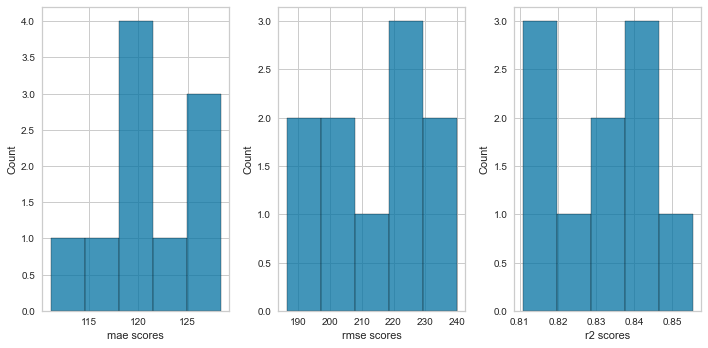

In [253]:
#Histograms of MAE, RMSE and R2 from the CV

df_scores=pd.DataFrame({'rmse scores':rmse_scores,'mae scores':mae_scores, 'r2 scores':r2_scores}) 

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(10, 5)

sns.histplot(df_scores['mae scores'],ax=ax1)
sns.histplot(df_scores['rmse scores'],ax=ax2)
sns.histplot(df_scores['r2 scores'],ax=ax3)

plt.tight_layout()
plt.show()

In [287]:
#fit the tuned model on the training set
rf_model.fit(X_train, y_train)

#predict rent on training data
train_pred = rf_model.predict(X_train)

In [288]:
#put the models results in a df
results_rf_train = pd.DataFrame(data=[["Training Set", *evaluate(y_train, train_pred)]], 
                          columns=['Random Forest', 'MAE', 'RMSE', 'R2 Square'])
results_rf_train 

,Random Forest,MAE,RMSE,R2 Square
0,Training Set,91.104721,162.154337,0.903537


In [289]:
#test the model on unseen (test) data
test_pred = rf_model.predict(X_test)

In [290]:
#test score in a DF
results_rf_test = pd.DataFrame(data=[["Test Set", *evaluate(y_test, test_pred)]], 
                          columns=['Random Forest', 'MAE', 'RMSE', 'R2 Square'])
results_rf_test


,Random Forest,MAE,RMSE,R2 Square
0,Test Set,119.541809,213.215094,0.835837


In [291]:
#Combine the train and test score results
results_df = results_rf_train.append(results_rf_test, ignore_index=True)
results_df

,Random Forest,MAE,RMSE,R2 Square
0,Training Set,91.104721,162.154337,0.903537
1,Test Set,119.541809,213.215094,0.835837


In [262]:
# Param list for the report
parameters = pd.DataFrame(data=[["n_estimators", "100", "1000"], ["max_depth", "None", "50"], ["min_samples_leaf", "1", "2"], ["min_samples_split", "2", "10"], ["max_features", "auto", "sqrt"]], 
                          columns=['Hyperparameters (Random Forest)', "Default value", 'Tuned value'])
parameters

,Hyperparameters (Random Forest),Default value,Tuned value
0,n_estimators,100,1000
1,max_depth,None,50
2,min_samples_leaf,1,2
3,min_samples_split,2,10
4,max_features,auto,sqrt


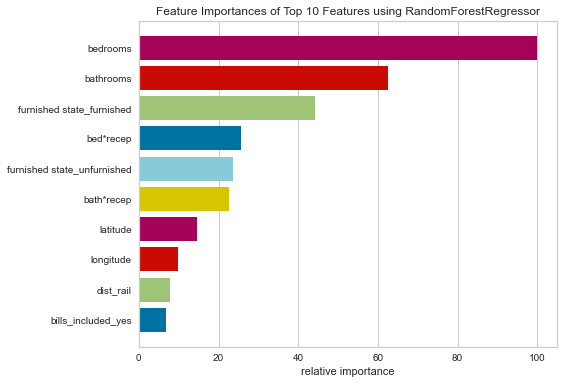

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='relative importance'>,
                   estimator=RandomForestRegressor(max_depth=50,
                                                   max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   n_estimators=1000,
                                                   random_state=5),
                   topn=10)

In [297]:
#Feature importance of RF model

feature_importances(rf_model, X_test, y_test, topn=10)

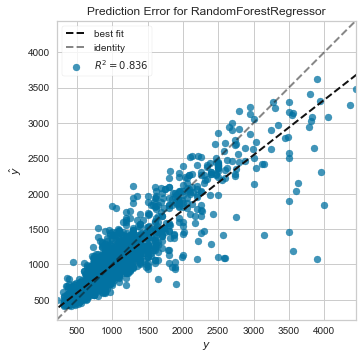

In [268]:
#Plot actual vs predicted plot

visualizer = prediction_error(rf_model, X_train, y_train, X_test, y_test)

In [269]:
#Learning curve of RF model over experience
train_errors, test_errors = [], []

for m in range(50, len(X_train), 100):
    rf_model.fit(X_train[:m], y_train[:m])
    y_train_predict = rf_model.predict(X_train[:m])
    y_test_predict = rf_model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train_predict, y_train[:m]))
    test_rmse = np.sqrt(mean_squared_error(y_test_predict, y_test))
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)


(100.0, 500.0)

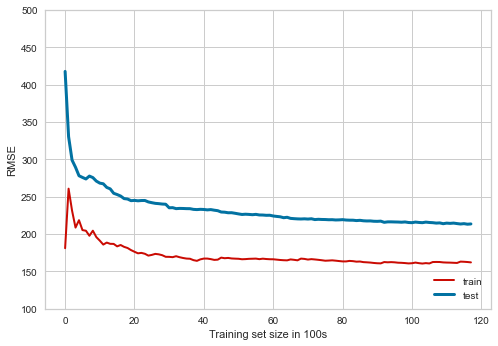

In [296]:
#Plot learning curve

plt.plot(train_errors, "r-",linewidth=2, label="train")
plt.plot(test_errors, "b-", linewidth=3, label="test")
plt.legend(loc="lower right")
plt.figsize=(8,8)
plt.xlabel("Training set size in 100s")
plt.ylabel("RMSE")
plt.ylim((100, 500))